In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [37]:
df=pd.read_csv('digit-recognizer/train.csv')

In [38]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [40]:
df.shape

(42000, 785)

In [41]:
len(df)


42000

In [42]:
df.iloc[0].shape

(785,)

In [43]:
y=df['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [44]:
X = df.drop('label', axis=1)

# Normalize the features
X = X / 255.0

X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


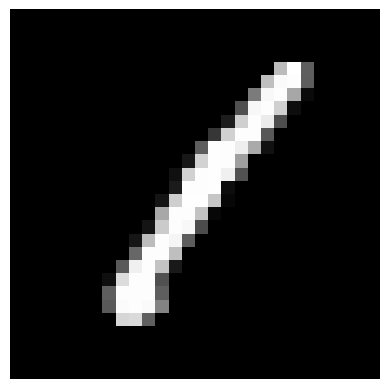

In [45]:
# Assuming X is your DataFrame with pixel values
first_row = X.iloc[0].values  # Get the values of the first row

# Reshape the row into a 28x28 grid
image_grid = np.reshape(first_row, (28, 28))

# Plot the image
plt.imshow(image_grid, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()


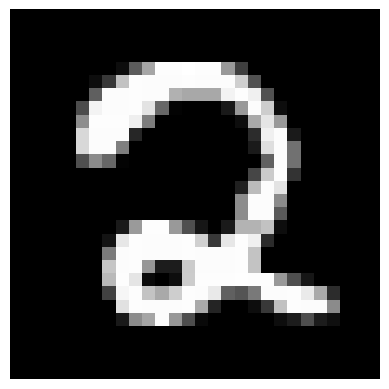

In [46]:
# Assuming X is your DataFrame with pixel values
first_row = X.iloc[97].values  # Get the values of the first row

# Reshape the row into a 28x28 grid
image_grid = np.reshape(first_row, (28, 28))

# Plot the image
plt.imshow(image_grid, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(33600, 784) (33600,)
(8400, 784) (8400,)


In [49]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Use softmax for multi-class classification
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [50]:
history = model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))


Epoch 1/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8719 - loss: 0.4312 - val_accuracy: 0.9562 - val_loss: 0.1433
Epoch 2/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9675 - loss: 0.0992 - val_accuracy: 0.9676 - val_loss: 0.1020
Epoch 3/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9808 - loss: 0.0601 - val_accuracy: 0.9619 - val_loss: 0.1276
Epoch 4/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9878 - loss: 0.0388 - val_accuracy: 0.9665 - val_loss: 0.1121
Epoch 5/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9895 - loss: 0.0309 - val_accuracy: 0.9732 - val_loss: 0.0968
Epoch 6/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9914 - loss: 0.0254 - val_accuracy: 0.9731 - val_loss: 0.1033
Epoch 7/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9936 - loss: 0.0200 - val_accuracy: 0.9725 - val_loss: 0.1117
Epoch 8/8
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9929 - loss: 0.0222 - val_acc

In [51]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy}')


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9668 - loss: 0.1441
Validation accuracy: 0.9704762101173401


In [52]:
# FINE TUNING the model with the testing segment as well which we divided earlier

history = model.fit(X_val, y_val, epochs=5)

Epoch 1/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9692 - loss: 0.1193
Epoch 2/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9862 - loss: 0.0402
Epoch 3/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9975 - loss: 0.0102
Epoch 4/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9999 - loss: 0.0023
Epoch 5/5
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 9.8638e-04


In [53]:
test = pd.read_csv('digit-recognizer/test.csv')

# Normalize the test data
test = test / 255.0

print(test.shape)


(28000, 784)


In [54]:
predictions = model.predict(test)

# Convert predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print a few predictions to check
print(predicted_labels[:10])


875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
[2 0 9 9 3 9 0 3 0 3]


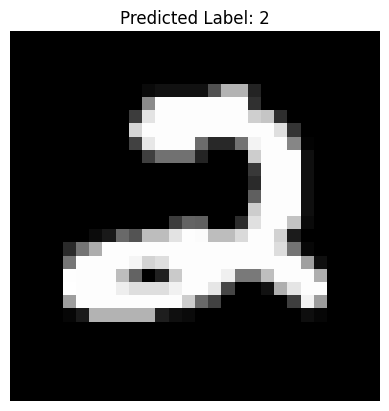

In [55]:
# Visualize the first test image and its predicted label
first_row = test.iloc[0].values  # Get the values of the first row
image_grid = np.reshape(first_row, (28, 28))  # Reshape the row into a 28x28 grid

plt.imshow(image_grid, cmap='gray')
plt.title(f'Predicted Label: {predicted_labels[0]}')
plt.axis('off')  # Hide axis
plt.show()


In [56]:
# Create a DataFrame with ImageId and Label
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [58]:
submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [142]:
# Load the MNIST dataset
#from keras.datasets import mnist
#(x_train, y_train), _ = mnist.load_data()

# Flatten x_train
#x_train_flattened = x_train.reshape(len(x_train), -1)


In [143]:
#y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [145]:
#model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9540 - loss: 16.2581
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9372 - loss: 0.3563
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9457 - loss: 0.2719
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9447 - loss: 0.2462
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9546 - loss: 0.2203
